<h1 style='color:orange'>Predict the Diabete Progression with XGBOOST</h1>

## Purpose of the Project
It aims to use medical data,sklearn diabete dataset, to predict the progression of diabete.
This work allow:
* A better understanding of factors which increase the risk of Diabete
* Craft predictives tools which may assist doctors in diagnosis and treatment planning
* Show how to implement Machine Learning  in medical field

## Steps

# 1) Loading Data with Pandas
I load and inspect the first rows,dimensions and general informations of this datasets through:
* X.head()
* X.shape()
* X.info()

# 2) EDA
It consists of:
* handling Descriptive Statistics
* Visualizing the target Distribution: We wanna check if it follows a particular distibution. It is important in modelisation
* Seeing the correlation of each variable with the Diabete progression :That way ,we can see the variables which impact more the progression of 
    Datasets.It allows to decrease the risks of Diabete

# 3) Data Pretraitement
For improving the performance of training, I standardize and scale the data.

# 4) Model Training
I train our model using the diabete dataset and XBOOST
.I also use cross_val_score to evaluate the robustness of our modele. 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb

In [76]:
data = load_diabetes()
X = pd.DataFrame(data.data,
                columns=data.feature_names)
y = pd.Series(data.target,
                name= 'Progression')
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [77]:
#See statistics about this dataset
print(X.shape)
print(X.info())
print(X.describe())

(442, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   

In [79]:
print(X.corrwith(y))

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64


# See the correlation between each variables and progression
 * bmi and s5 impact more the progression of diabete regarding to their correlation with the diabete progression
 * But S3 doesnt have a big impact in the diabete progression. The negative correlation testify to this fact

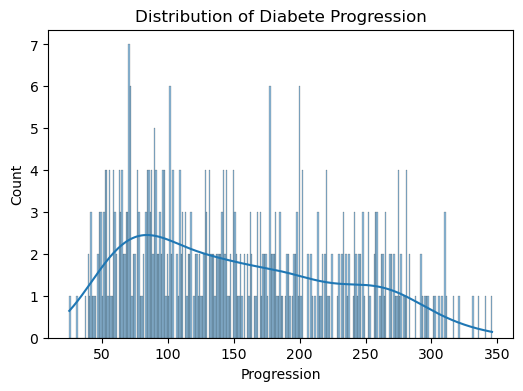

In [80]:
#Lets try to see whether the progression follow a particular distribution or not
plt.figure(figsize=(6,4))
sns.histplot(y,bins=300,kde=True)
plt.title('Distribution of Diabete Progression')
plt.show() # as soon as we use jupiter, it is useless. With others such as SPIDER, you will need to add thi command

## Model Training Using XGBOOST

In [81]:
# For improving the performance of the model, We must standardize and scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [86]:
model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 100,
    learning_rate = 0.05,
    max_depth = 3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

# training model
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
cv = KFold(n_splits=5,
shuffle=True,random_state = 42)
scores = cross_val_score(model,X,y,cv=cv,scoring='r2')
print(scores)
print(f'The set of scores has a mean of: {np.mean(scores)} and a standard deviation of {np.std(scores)}')


[0.4625005  0.55229006 0.29733825 0.51207139 0.41461569]
The set of scores has a mean of: 0.4477631744763155 and a standard deviation of 0.08832329080672889


## What I has learnt

* How to implement a complet data science workflow: Exploration -> Pretraitment > Modelisation -> Evaluation
* The importance of data Standardization in Model Training
* How to handle XGBOOST ,one the most performant algorithm for regression . It can be extend to Classification
* How to interpret the results through the importance of features and correlations

## Purpose , Impacts or Avantages
The Diabete is a chronic disease which touch a lot of people in the world
A predictive Model may :
* Monitor and Anticipate disease advancement
* Improve Prevention
* Help Medical research


<h3 style='color:red'>Even I use a small,public and simplified datasets , it shows how AI may positively impact 
the health Domain</h3>
